<a href="https://colab.research.google.com/github/codemishka/Prediction-of-Product-Sales/blob/main/1689878241343_Untitled6__1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data

# Imports

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [73]:
fname='/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'

In [74]:
# load in the data as a pandas dataframe
df = pd.read_csv(fname)

In [60]:
df.info() and df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [61]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Cleaning

The data has 8523 rows and 12 Columns

In [62]:
df.shape

(8523, 12)

In [63]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

There are no unnamed columns.

All  data types are as they should be.

# Duplicated Data

In [64]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

There are no duplicated rows.

# Missing Values

Inspecting Categorical Columns & Addressing Inconsistent Values

In [65]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#Strategy #1: To deal with the missing values, we could simply drop the missing values.

In [67]:
df.dropna(subset=['Outlet_Size'], inplace=True)

checking the missing values

In [66]:

df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

In [68]:
data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [69]:
for col in str_cols:
    print(f'- {col}:')
    print(df[col].value_counts(dropna=False))
    print("\n\n")

- Item_Identifier:
NCM07    7
FDT07    7
FDN21    7
FDU12    7
FDE11    7
        ..
FDZ02    1
FDN52    1
FDG28    1
DRI59    1
FDV31    1
Name: Item_Identifier, Length: 1555, dtype: int64



- Item_Fat_Content:
Low Fat    3641
Regular    2076
LF          233
reg          82
low fat      81
Name: Item_Fat_Content, dtype: int64



- Item_Type:
Fruits and Vegetables    883
Snack Foods              868
Household                649
Frozen Foods             615
Dairy                    496
Canned                   471
Baking Goods             463
Health and Hygiene       367
Soft Drinks              312
Meat                     309
Breads                   179
Hard Drinks              148
Others                   123
Starchy Foods            105
Breakfast                 79
Seafood                   46
Name: Item_Type, dtype: int64



- Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT018    928
OUT019    528
Name: Outlet_Identifier, dtype: int64


Grocery Store needs to be changed to SuperMarket type 4 but I got stuck at this point.

# Summary statistics of each (min, max, mean).

In [75]:
#Summary Statistics for Numeric Features
stats =  df.describe()
stats.loc[['mean','min','max']]


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
min,4.555000,0.000000,31.290000,1985.000000,33.290000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Histograms to view the distributions of numerical features in your dataset.

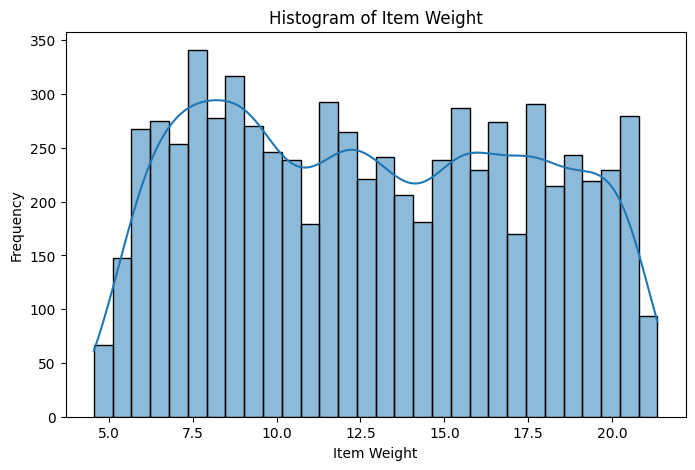

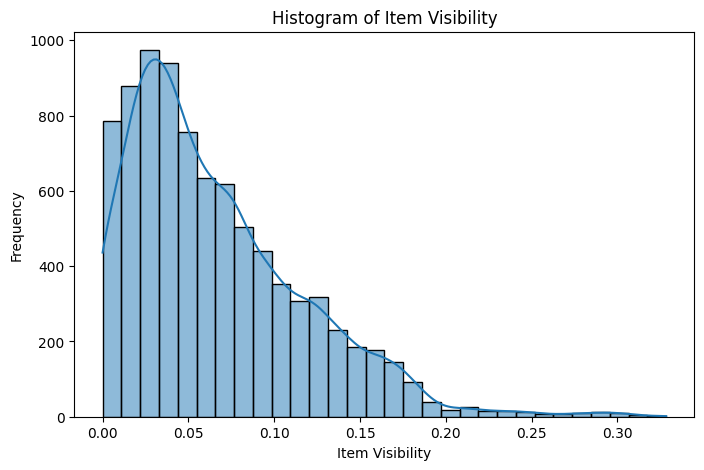

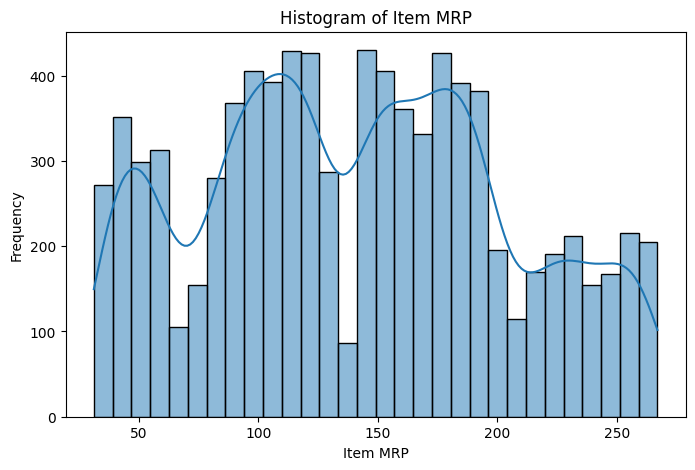

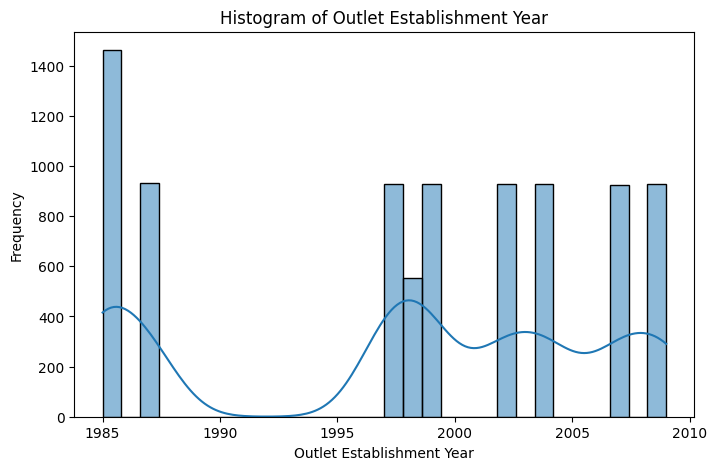

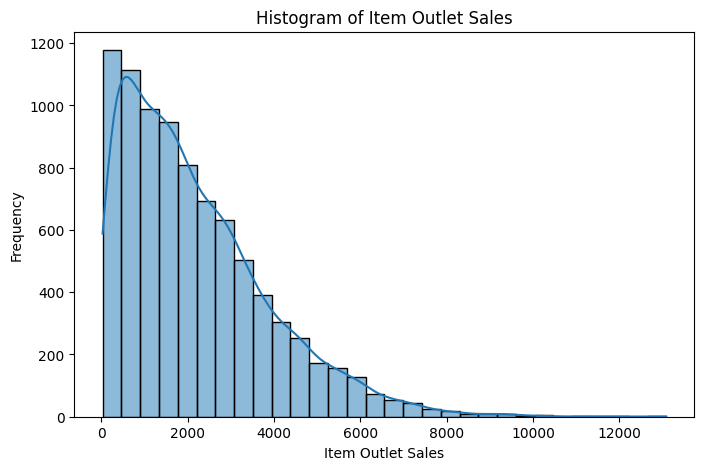

In [76]:
# Create a histogram for the 'Item_Weight' column
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Item_Weight', bins=30, kde=True)
plt.title('Histogram of Item Weight')
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.show()

# Create a histogram for the 'Item_Visibility' column
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Item_Visibility', bins=30, kde=True)
plt.title('Histogram of Item Visibility')
plt.xlabel('Item Visibility')
plt.ylabel('Frequency')
plt.show()

# Create a histogram for the 'Item_MRP' column
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Item_MRP', bins=30, kde=True)
plt.title('Histogram of Item MRP')
plt.xlabel('Item MRP')
plt.ylabel('Frequency')
plt.show()

# Create a histogram for the 'Outlet_Establishment_Year' column
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Outlet_Establishment_Year', bins=30, kde=True)
plt.title('Histogram of Outlet Establishment Year')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Frequency')
plt.show()

# Create a histogram for the 'Item_Outlet_Sales' column
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Item_Outlet_Sales', bins=30, kde=True)
plt.title('Histogram of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')
plt.show()

# Boxplots to view statistical summaries of numerical features in your dataset.

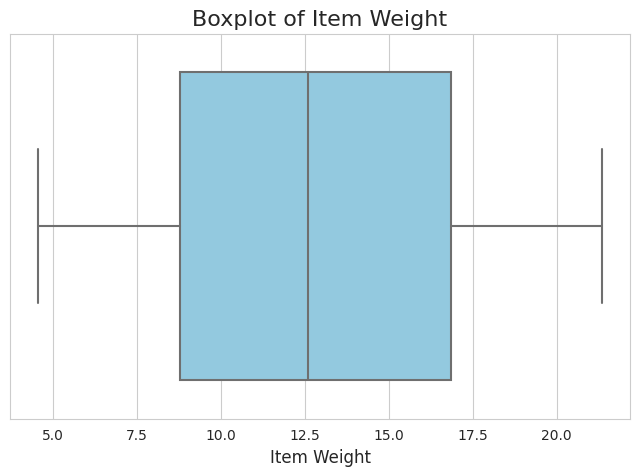

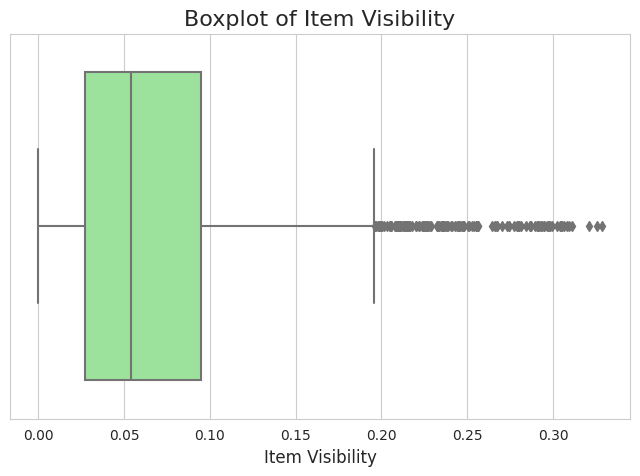

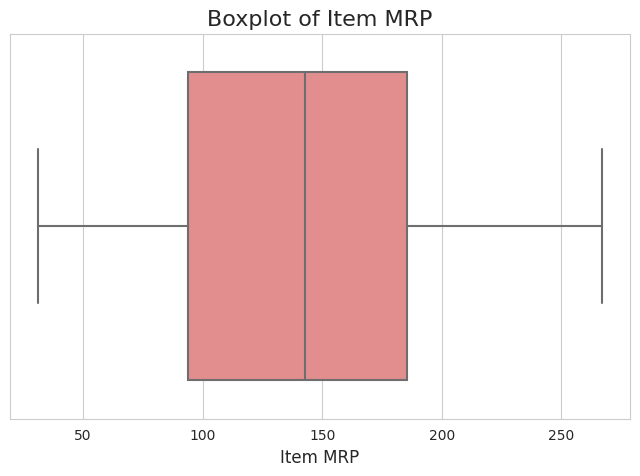

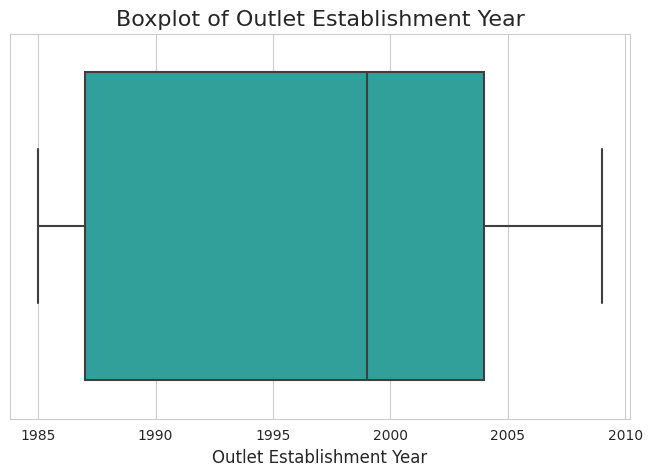

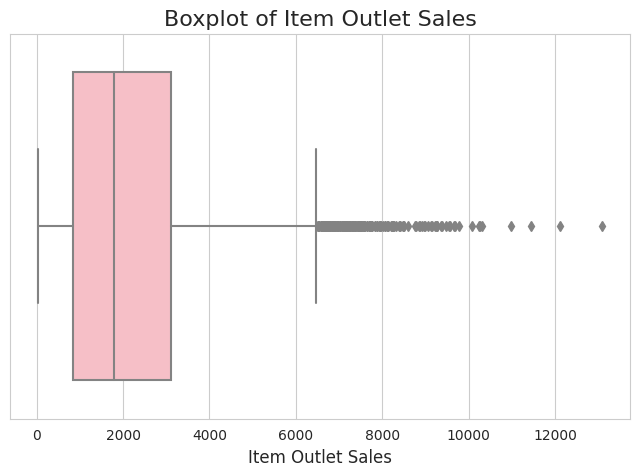

In [78]:
# Set style and color palette for Seaborn
sns.set_style('whitegrid')
sns.set_palette('pastel')

# Create a boxplot for the 'Item_Weight' column
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Item_Weight', color='skyblue')
plt.title('Boxplot of Item Weight', fontsize=16)
plt.xlabel('Item Weight', fontsize=12)
plt.show()

# Create a boxplot for the 'Item_Visibility' column
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Item_Visibility', color='lightgreen')
plt.title('Boxplot of Item Visibility', fontsize=16)
plt.xlabel('Item Visibility', fontsize=12)
plt.show()

# Create a boxplot for the 'Item_MRP' column
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Item_MRP', color='lightcoral')
plt.title('Boxplot of Item MRP', fontsize=16)
plt.xlabel('Item MRP', fontsize=12)
plt.show()

# Create a boxplot for the 'Outlet_Establishment_Year' column
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Outlet_Establishment_Year', color='lightseagreen')
plt.title('Boxplot of Outlet Establishment Year', fontsize=16)
plt.xlabel('Outlet Establishment Year', fontsize=12)
plt.show()

# Create a boxplot for the 'Item_Outlet_Sales' column
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Item_Outlet_Sales', color='lightpink')
plt.title('Boxplot of Item Outlet Sales', fontsize=16)
plt.xlabel('Item Outlet Sales', fontsize=12)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 36.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


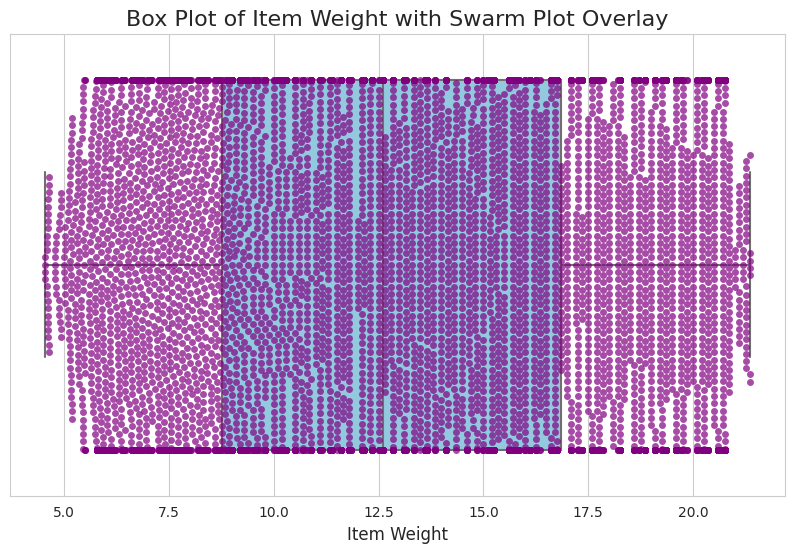

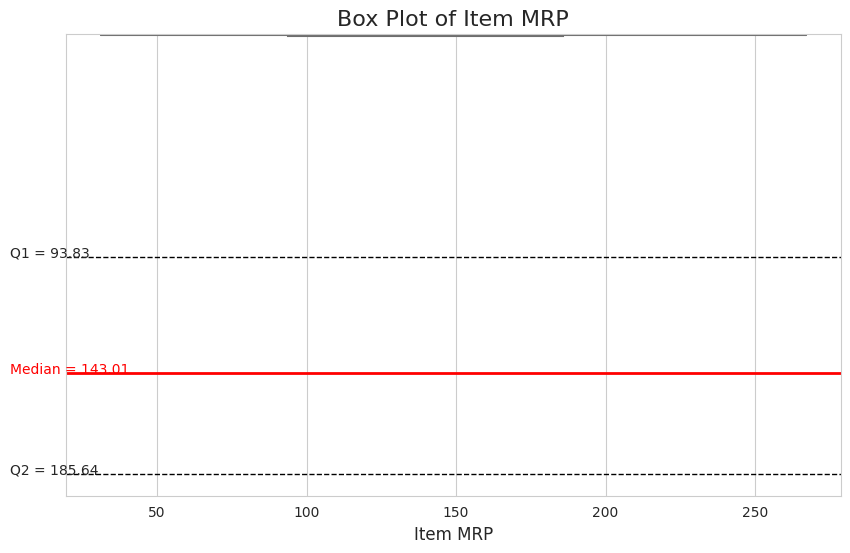

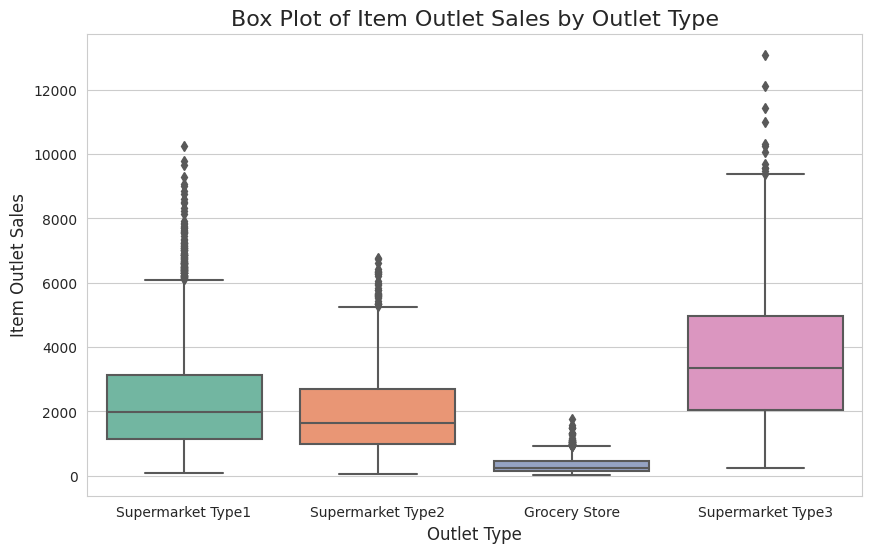

In [80]:
# Set style and color palette for Seaborn
sns.set_style('whitegrid')
sns.set_palette('pastel')

# Create a complex box plot for 'Item_Weight' with swarm plot overlay
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Item_Weight', color='skyblue')
sns.swarmplot(data=df, x='Item_Weight', color='purple', alpha=0.7)
plt.title('Box Plot of Item Weight with Swarm Plot Overlay', fontsize=16)
plt.xlabel('Item Weight', fontsize=12)
plt.show()

# Create a complex box plot for 'Item_MRP' with additional statistical information
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Item_MRP', color='lightcoral')
plt.title('Box Plot of Item MRP', fontsize=16)
plt.xlabel('Item MRP', fontsize=12)

# Add median and quartile lines
medians = df['Item_MRP'].median()
quartiles = df['Item_MRP'].quantile([0.25, 0.75]).values
for pos in range(len(quartiles)):
    plt.axhline(y=quartiles[pos], linestyle='--', linewidth=1, color='black')
    plt.text(x=0.85, y=quartiles[pos], s=f'Q{pos+1} = {quartiles[pos]:.2f}', fontsize=10)

# Add the median line
plt.axhline(y=medians, linestyle='-', linewidth=2, color='red')
plt.text(x=0.85, y=medians, s=f'Median = {medians:.2f}', fontsize=10, color='red')

plt.show()

# Create a complex box plot for 'Item_Outlet_Sales' with grouped box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales', palette='Set2')
plt.title('Box Plot of Item Outlet Sales by Outlet Type', fontsize=16)
plt.xlabel('Outlet Type', fontsize=12)
plt.ylabel('Item Outlet Sales', fontsize=12)
plt.show()

# Countplots to view the frequency of each class of categorial features in your dataset.



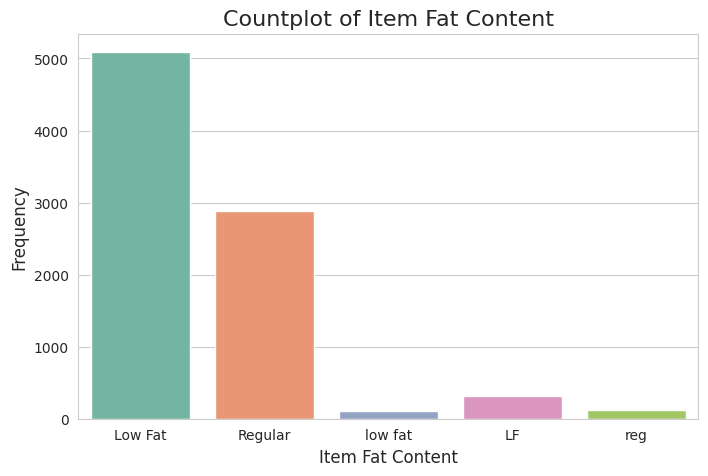

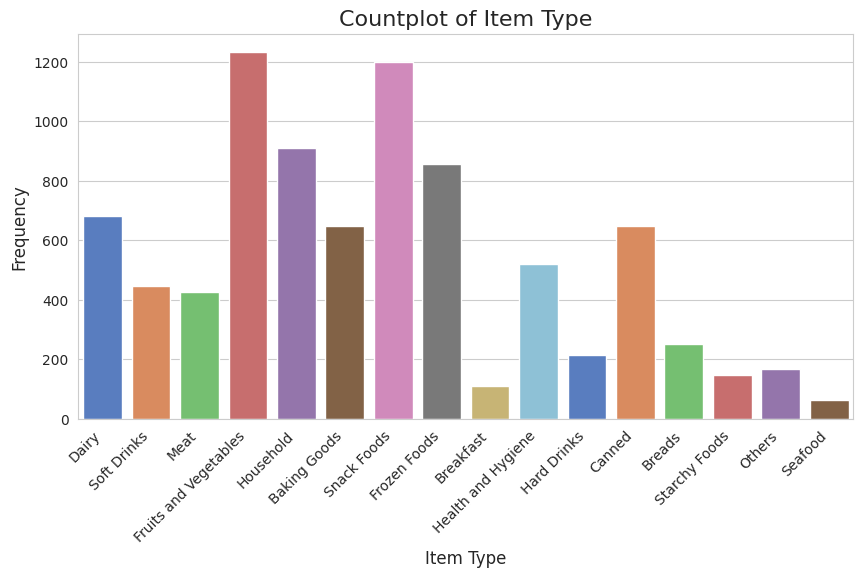

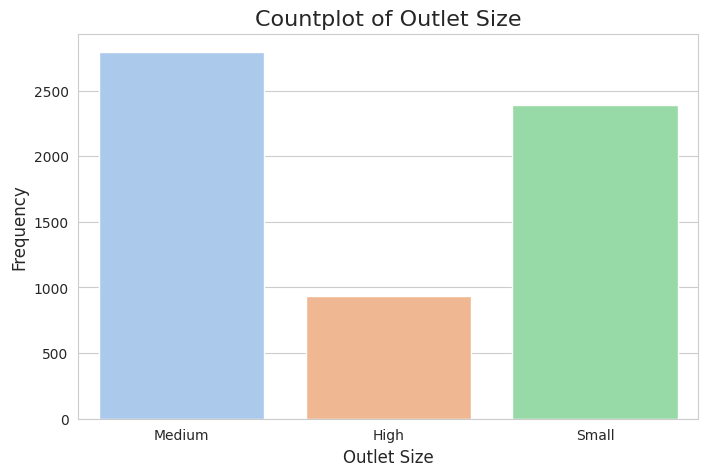

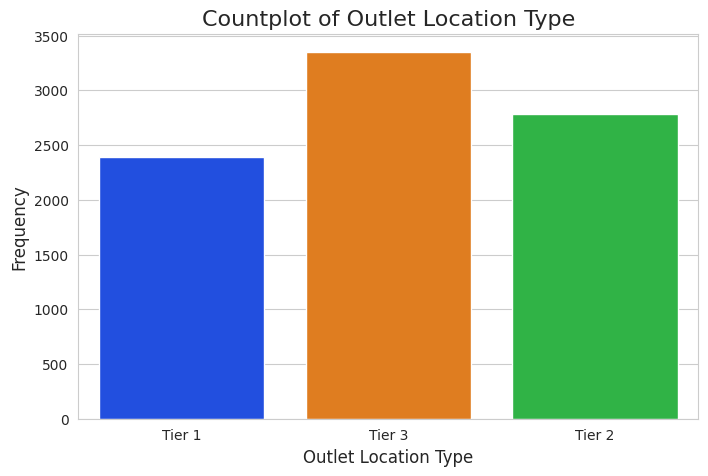

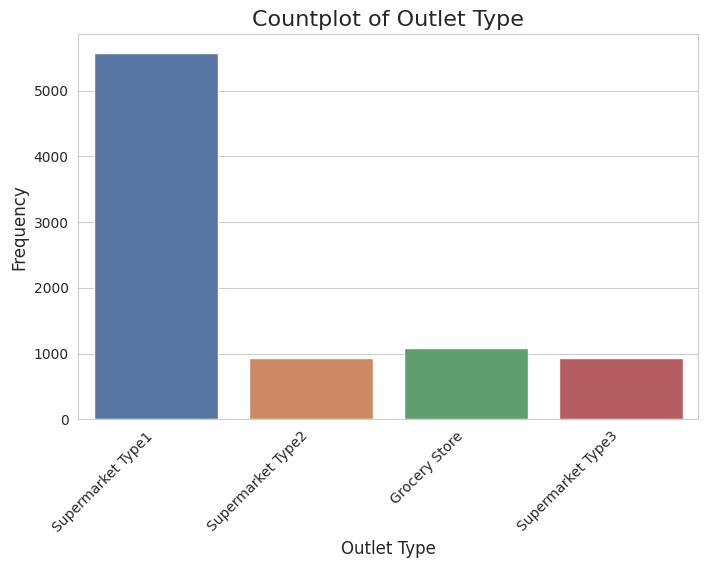

In [79]:
# Set style and color palette for Seaborn
sns.set_style('whitegrid')
sns.set_palette('pastel')

# Create a countplot for the 'Item_Fat_Content' column
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Item_Fat_Content', palette='Set2')
plt.title('Countplot of Item Fat Content', fontsize=16)
plt.xlabel('Item Fat Content', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Create a countplot for the 'Item_Type' column
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Item_Type', palette='muted')
plt.title('Countplot of Item Type', fontsize=16)
plt.xlabel('Item Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

# Create a countplot for the 'Outlet_Size' column
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Outlet_Size', palette='pastel')
plt.title('Countplot of Outlet Size', fontsize=16)
plt.xlabel('Outlet Size', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Create a countplot for the 'Outlet_Location_Type' column
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Outlet_Location_Type', palette='bright')
plt.title('Countplot of Outlet Location Type', fontsize=16)
plt.xlabel('Outlet Location Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Create a countplot for the 'Outlet_Type' column
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Outlet_Type', palette='deep')
plt.title('Countplot of Outlet Type', fontsize=16)
plt.xlabel('Outlet Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

# Heatmap to view the correlation between features.

In [83]:
corr = df.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.03,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.03,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


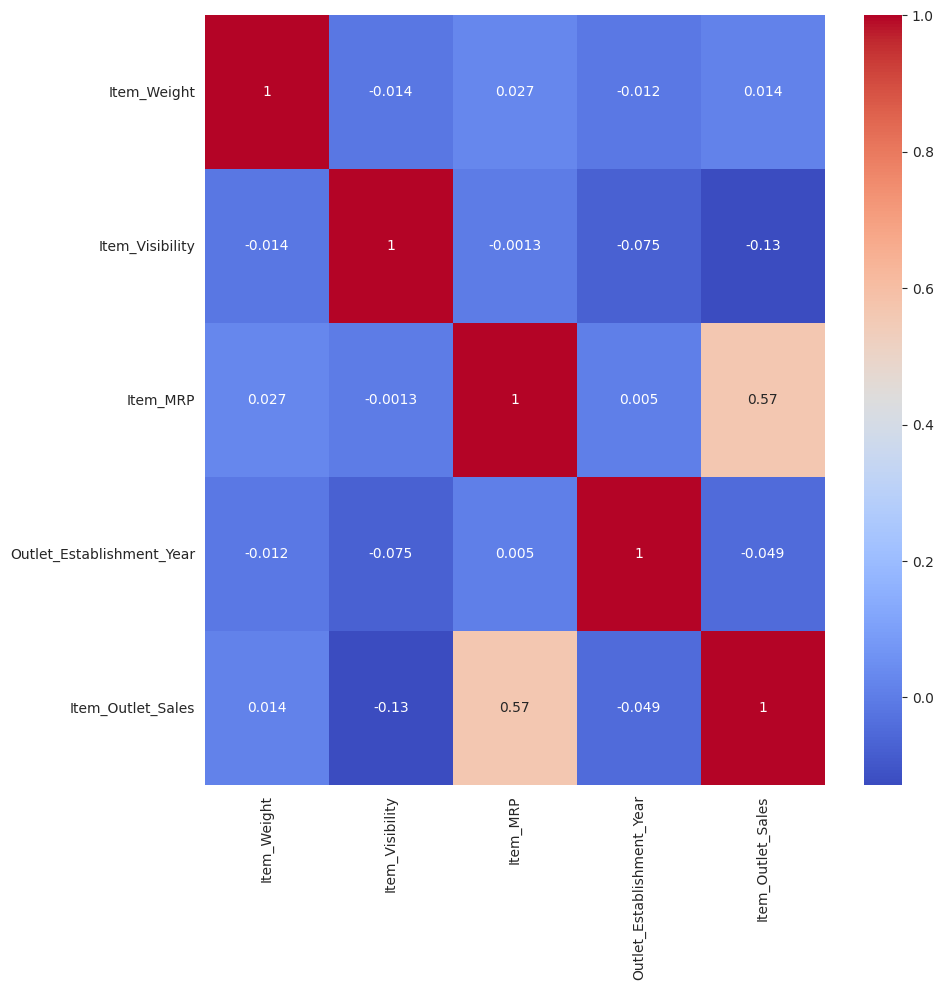

In [86]:
# Create a fig, ax with a figsize argument
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, cmap = 'coolwarm', annot = True, ax=ax);# Create a fig, ax with a figsize argument